In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv("data_frame.csv",error_bad_lines=False, sep=',',  encoding='latin-1')


In [66]:
df =df.fillna(0)

In [8]:
df.ix[45862,'details.name']

/Users/reneewu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


'7 Wonders Duel'

In [81]:
df.loc[df['details.name'] == 'Codenames','Renee'] = 1

In [44]:
print(df)

KeyError: 'No'

In [7]:
print(df.loc[df['Renee'] !=0]['Labels'])

147      0
1323     0
1665     0
2140     0
2167     0
2476     0
5483     0
9358     0
9962     0
17552    3
19118    3
22063    3
25278    2
25772    2
30765    2
31485    2
31974    2
32893    2
35226    2
38652    2
41758    1
45862    1
Name: Labels, dtype: int32


In [2]:
no = ['details.name','game.type']

X = df.loc[:,df.columns != 'details.name']

In [3]:
from sklearn.cluster import KMeans

In [4]:
X = X[X['stats.average'] != 0]

In [84]:
df.to_csv('dataframe.csv')

In [5]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [6]:
df['Labels'] = kmeans.labels_

In [8]:
rec = df.loc[df['Labels'] ==0]

In [32]:
recc.to_csv('Second_Rec.csv')

In [9]:
rec['Rank'] = rec['stats.average'].rank()

/Users/reneewu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [51]:
rec['Rank_weight'] = rec['stats.averageweight'].rank()

/Users/reneewu/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
rec = rec[rec['stats.wishing'] >= 1000]

In [12]:
rec.tail()

,Unnamed: 0,Acting,Action / Movement Programming,Action Point Allowance System,Area Control / Area Influence,Area Enclosure,Area Movement,Area-Impulse,Auction/Bidding,Betting/Wagering,...,polls.suggested_numplayers.5,polls.suggested_numplayers.6,polls.suggested_numplayers.7,polls.suggested_numplayers.8,polls.suggested_numplayers.9,polls.suggested_numplayers.Over,polls.suggested_playerage,Labels,Renee,Rank
11278,11278,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,12,0,0,12177.0
11931,11931,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,-1,8,0,0,12051.0
11983,11983,0,0,0,0,0,0,0,0,0,...,3,3,3,0,0,-1,10,0,0,11558.0
12200,12200,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,-1,10,0,0,11710.0
12299,12299,0,0,0,0,0,0,0,0,0,...,1,3,3,3,0,-1,5,0,0,10529.0


In [15]:
rec.loc[rec['Rank'] >=12000]['details.name'] 

0                               Die Macher
37                      Tigris & Euphrates
80                          Paths of Glory
106                                   Dune
160                                     Go
196            Hannibal: Rome vs. Carthage
435                              Crokinole
463                The Princes of Florence
729                          Roads & Boats
775          Star Wars: The Queen's Gambit
1207                  The Republic of Rome
2140                            Power Grid
2476                           Puerto Rico
2995                   Hammer of the Scots
3336                          Age of Steam
6396                                 YINSH
7475                                   Goa
7792       War of the Ring (first edition)
8631                            Memoir '44
9962                     Twilight Struggle
10085    Twilight Imperium (Third Edition)
10560                            Antiquity
11278          Commands & Colors: Ancients
11931      

In [52]:
rec = rec.sort_values(by = ['Rank'])

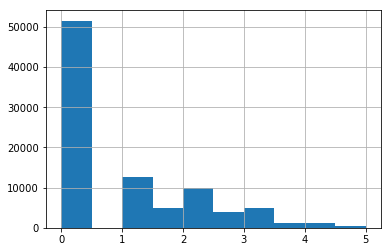

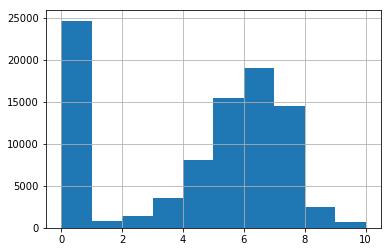

In [16]:
df['stats.averageweight'].hist()
plt.show()
df['stats.average'].hist()
plt.show()